In [1]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [5]:
import os
import pandas as pd

os.getcwd()

'/home/piai/바탕화면/01 실습파일/2. Big Data 분석'

In [6]:
os.chdir('/home/piai/바탕화면/01 실습파일/2. Big Data 분석')

# 실습1 - 회귀분석

In [60]:
# 45 Page
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 선형 회귀모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 잔차의 정규성 확인 :qqplot, 회귀분석의 상수항 추가 : add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리:train, test
from sklearn.model_selection import train_test_split
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from sklearn.metrics import r2_score
# 회귀분석의 정규성 확인
from statsmodels.api import qqplot
from statsmodels.api import add_constant

In [61]:
df = pd.read_csv("보험료.csv", encoding = 'euc-kr')
df.head()

,고객번호,성별,나이,BMI,자녀수,흡연여부,가입유형,납부유형,보장범위,납입기간,보험료
0,ID100001,남성,19,27.9,0,1,홈쇼핑,은행,19,40,168849
1,ID100002,여성,18,33.8,1,0,인터넷,은행,10,40,17255
2,ID100003,여성,28,33.0,3,0,상담사,카드,12,30,44494
3,ID100004,여성,33,22.7,0,0,홈쇼핑,지로,15,30,219844
4,ID100005,여성,32,28.9,0,0,인터넷,카드,9,30,38668


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객번호    1343 non-null   object 
 1   성별      1343 non-null   object 
 2   나이      1343 non-null   int64  
 3   BMI     1343 non-null   float64
 4   자녀수     1343 non-null   int64  
 5   흡연여부    1343 non-null   int64  
 6   가입유형    1341 non-null   object 
 7   납부유형    1340 non-null   object 
 8   보장범위    1343 non-null   int64  
 9   납입기간    1343 non-null   int64  
 10  보험료     1343 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 115.5+ KB


In [63]:
df.isnull().sum()

고객번호    0
성별      0
나이      0
BMI     0
자녀수     0
흡연여부    0
가입유형    2
납부유형    3
보장범위    0
납입기간    0
보험료     0
dtype: int64

In [64]:
# 항목 제외
df = df.drop(['고객번호'], axis = 1)

In [65]:
unique_values = df['가입유형'].value_counts() 
unique_values

인터넷    574
홈쇼핑    385
상담사    382
Name: 가입유형, dtype: int64

In [66]:
unique_values = df['납부유형'].value_counts() 
unique_values

카드    668
은행    537
지로    135
Name: 납부유형, dtype: int64

In [67]:
# 문자형 결측치 처리:pandas.DataFrame.fillna(값, inplace: 결측치 입력 후 저장 여부)
df["가입유형"].fillna("인터넷", inplace = True)
df["납부유형"].fillna("카드", inplace = True)
df.head()

,성별,나이,BMI,자녀수,흡연여부,가입유형,납부유형,보장범위,납입기간,보험료
0,남성,19,27.9,0,1,홈쇼핑,은행,19,40,168849
1,여성,18,33.8,1,0,인터넷,은행,10,40,17255
2,여성,28,33.0,3,0,상담사,카드,12,30,44494
3,여성,33,22.7,0,0,홈쇼핑,지로,15,30,219844
4,여성,32,28.9,0,0,인터넷,카드,9,30,38668


In [68]:
# 범주형 변수의 Dummy 변수화
df_dummy = pd.get_dummies(df, columns=['성별','가입유형', '납부유형'], drop_first = True)
df_dummy.head()

,나이,BMI,자녀수,흡연여부,보장범위,납입기간,보험료,성별_여성,가입유형_인터넷,가입유형_홈쇼핑,납부유형_지로,납부유형_카드
0,19,27.9,0,1,19,40,168849,0,0,1,0,0
1,18,33.8,1,0,10,40,17255,1,1,0,0,0
2,28,33.0,3,0,12,30,44494,1,0,0,0,1
3,33,22.7,0,0,15,30,219844,1,0,1,1,0
4,32,28.9,0,0,9,30,38668,1,1,0,0,1


In [69]:
df_dummy.dtypes

나이            int64
BMI         float64
자녀수           int64
흡연여부          int64
보장범위          int64
납입기간          int64
보험료           int64
성별_여성         uint8
가입유형_인터넷      uint8
가입유형_홈쇼핑      uint8
납부유형_지로       uint8
납부유형_카드       uint8
dtype: object

In [38]:
# 결측치 확인
df_dummy.isnull().sum()

나이          0
BMI         0
자녀수         0
흡연여부        0
보장범위        0
납입기간        0
보험료         0
성별_여성       0
가입유형_인터넷    0
가입유형_홈쇼핑    0
납부유형_지로     0
납부유형_카드     0
dtype: int64

In [70]:
# 요약통계량
df_dummy.describe().round(3)

,나이,BMI,자녀수,흡연여부,보장범위,납입기간,보험료,성별_여성,가입유형_인터넷,가입유형_홈쇼핑,납부유형_지로,납부유형_카드
count,1343.000,1343.000,1343.000,1343.000,1343.000,1343.000,1343.000,1343.000,1343.000,1343.000,1343.000,1343.0
mean,39.186,30.666,1.093,0.205,11.575,28.220,132549.095,0.504,0.429,0.287,0.101,0.5
std,14.072,6.091,1.206,0.404,2.532,6.095,121072.476,0.500,0.495,0.452,0.301,0.5
min,18.000,16.000,0.000,0.000,8.000,20.000,11218.000,0.000,0.000,0.000,0.000,0.0
25%,26.000,26.300,0.000,0.000,10.000,20.000,47196.000,0.000,0.000,0.000,0.000,0.0
50%,39.000,30.400,1.000,0.000,11.000,30.000,93779.000,1.000,0.000,0.000,0.000,0.0
75%,51.000,34.700,2.000,0.000,12.000,30.000,166220.500,1.000,1.000,1.000,0.000,1.0
max,64.000,53.100,5.000,1.000,20.000,40.000,637704.000,1.000,1.000,1.000,1.000,1.0


In [71]:
df_dummy.select_dtypes('number').corr()

,나이,BMI,자녀수,흡연여부,보장범위,납입기간,보험료,성별_여성,가입유형_인터넷,가입유형_홈쇼핑,납부유형_지로,납부유형_카드
나이,1.000000,0.108021,0.044999,-0.021275,-0.018750,-0.825543,0.301881,-0.018106,-0.019917,-0.018456,-0.003016,-0.022540
BMI,0.108021,1.000000,0.012559,0.003399,0.015008,-0.138645,0.197541,0.046174,-0.019644,-0.025285,0.017375,0.001390
자녀수,0.044999,0.012559,1.000000,0.006742,0.188175,-0.039295,0.068490,0.020989,-0.011996,-0.028459,-0.025813,0.021678
흡연여부,-0.021275,0.003399,0.006742,1.000000,0.701163,0.045247,0.787592,0.075191,-0.085546,0.057801,0.002189,-0.001467
보장범위,-0.018750,0.015008,0.188175,0.701163,1.000000,0.144063,0.703848,-0.004801,-0.092182,0.063543,0.024844,0.000757
납입기간,-0.825543,-0.138645,-0.039295,0.045247,0.144063,1.000000,-0.282787,0.054949,0.028411,0.006796,0.012294,0.003449
보험료,0.301881,0.197541,0.068490,0.787592,0.703848,-0.282787,1.000000,0.058050,-0.097490,0.047536,0.014744,0.000820
성별_여성,-0.018106,0.046174,0.020989,0.075191,-0.004801,0.054949,0.058050,1.000000,0.013966,-0.026599,-0.005215,0.035004
가입유형_인터넷,-0.019917,-0.019644,-0.011996,-0.085546,-0.092182,0.028411,-0.097490,0.013966,1.000000,-0.549365,-0.004504,-0.002364
가입유형_홈쇼핑,-0.018456,-0.025285,-0.028459,0.057801,0.063543,0.006796,0.047536,-0.026599,-0.549365,1.000000,0.111159,-0.063745


<Axes: >

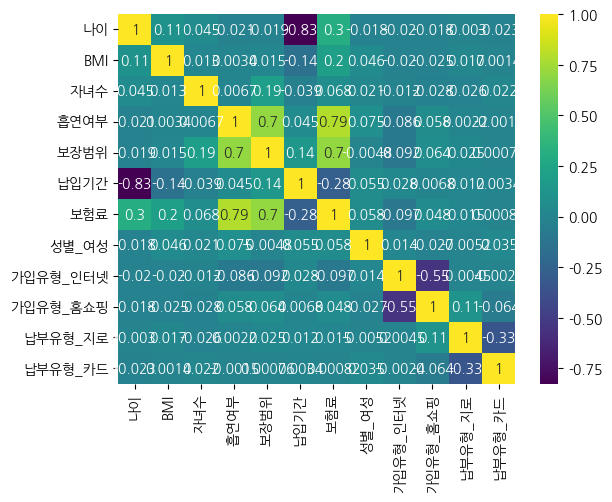

In [72]:
sns.heatmap(df_dummy.select_dtypes('number').corr(), annot=True, cmap="viridis")

In [81]:
# 나이          0
# BMI         0
# 자녀수         0
# 흡연여부        0
# 보장범위        0
# 납입기간        0
# 보험료         0
# 성별_여성       0
# 가입유형_인터넷    0
# 가입유형_홈쇼핑    0
# 납부유형_지로     0
# 납부유형_카드     0


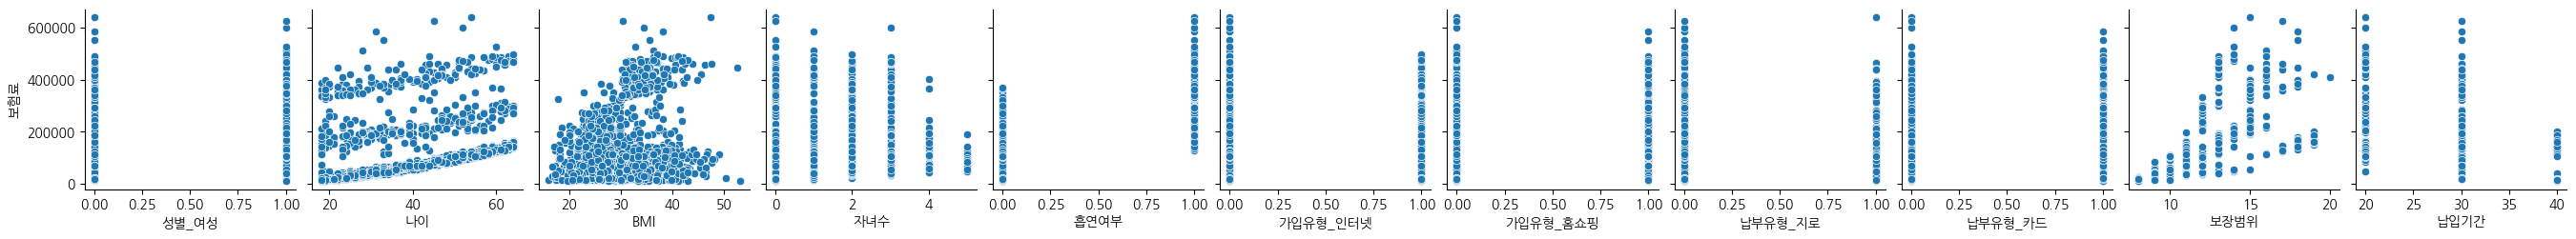

In [82]:
# 산점도 행렬:목표변수와 설명변수 지정
sns.pairplot(df_dummy, y_vars="보험료", x_vars=["성별_여성","나이","BMI","자녀수","흡연여부","가입유형_인터넷","가입유형_홈쇼핑","납부유형_지로","납부유형_카드","보장범위","납입기간"])

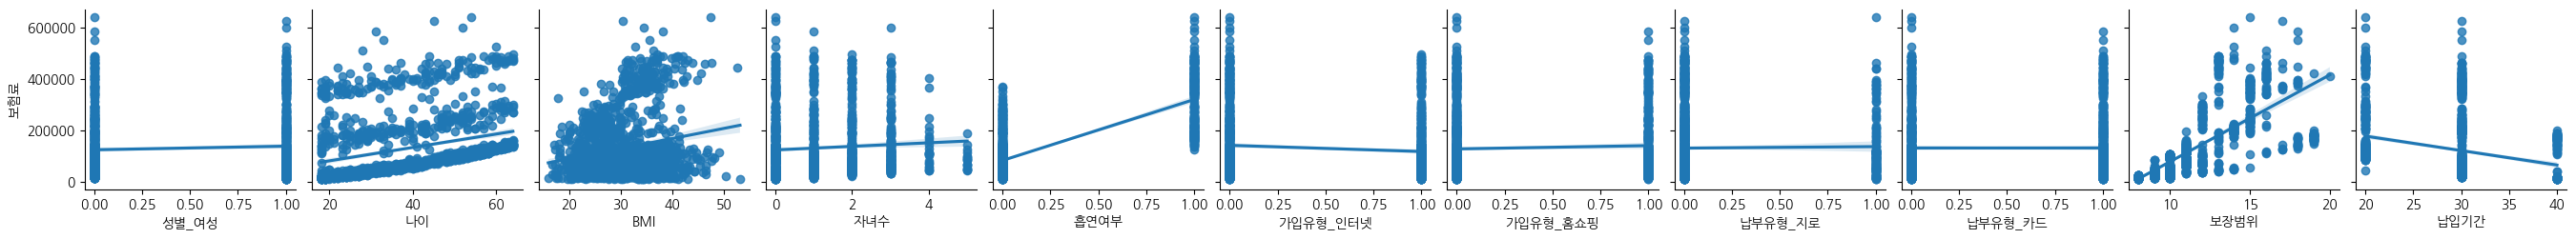

In [83]:

sns.pairplot(df_dummy, y_vars="보험료", x_vars=["성별_여성","나이","BMI","자녀수","흡연여부","가입유형_인터넷","가입유형_홈쇼핑","납부유형_지로","납부유형_카드","보장범위","납입기간"], kind="reg")

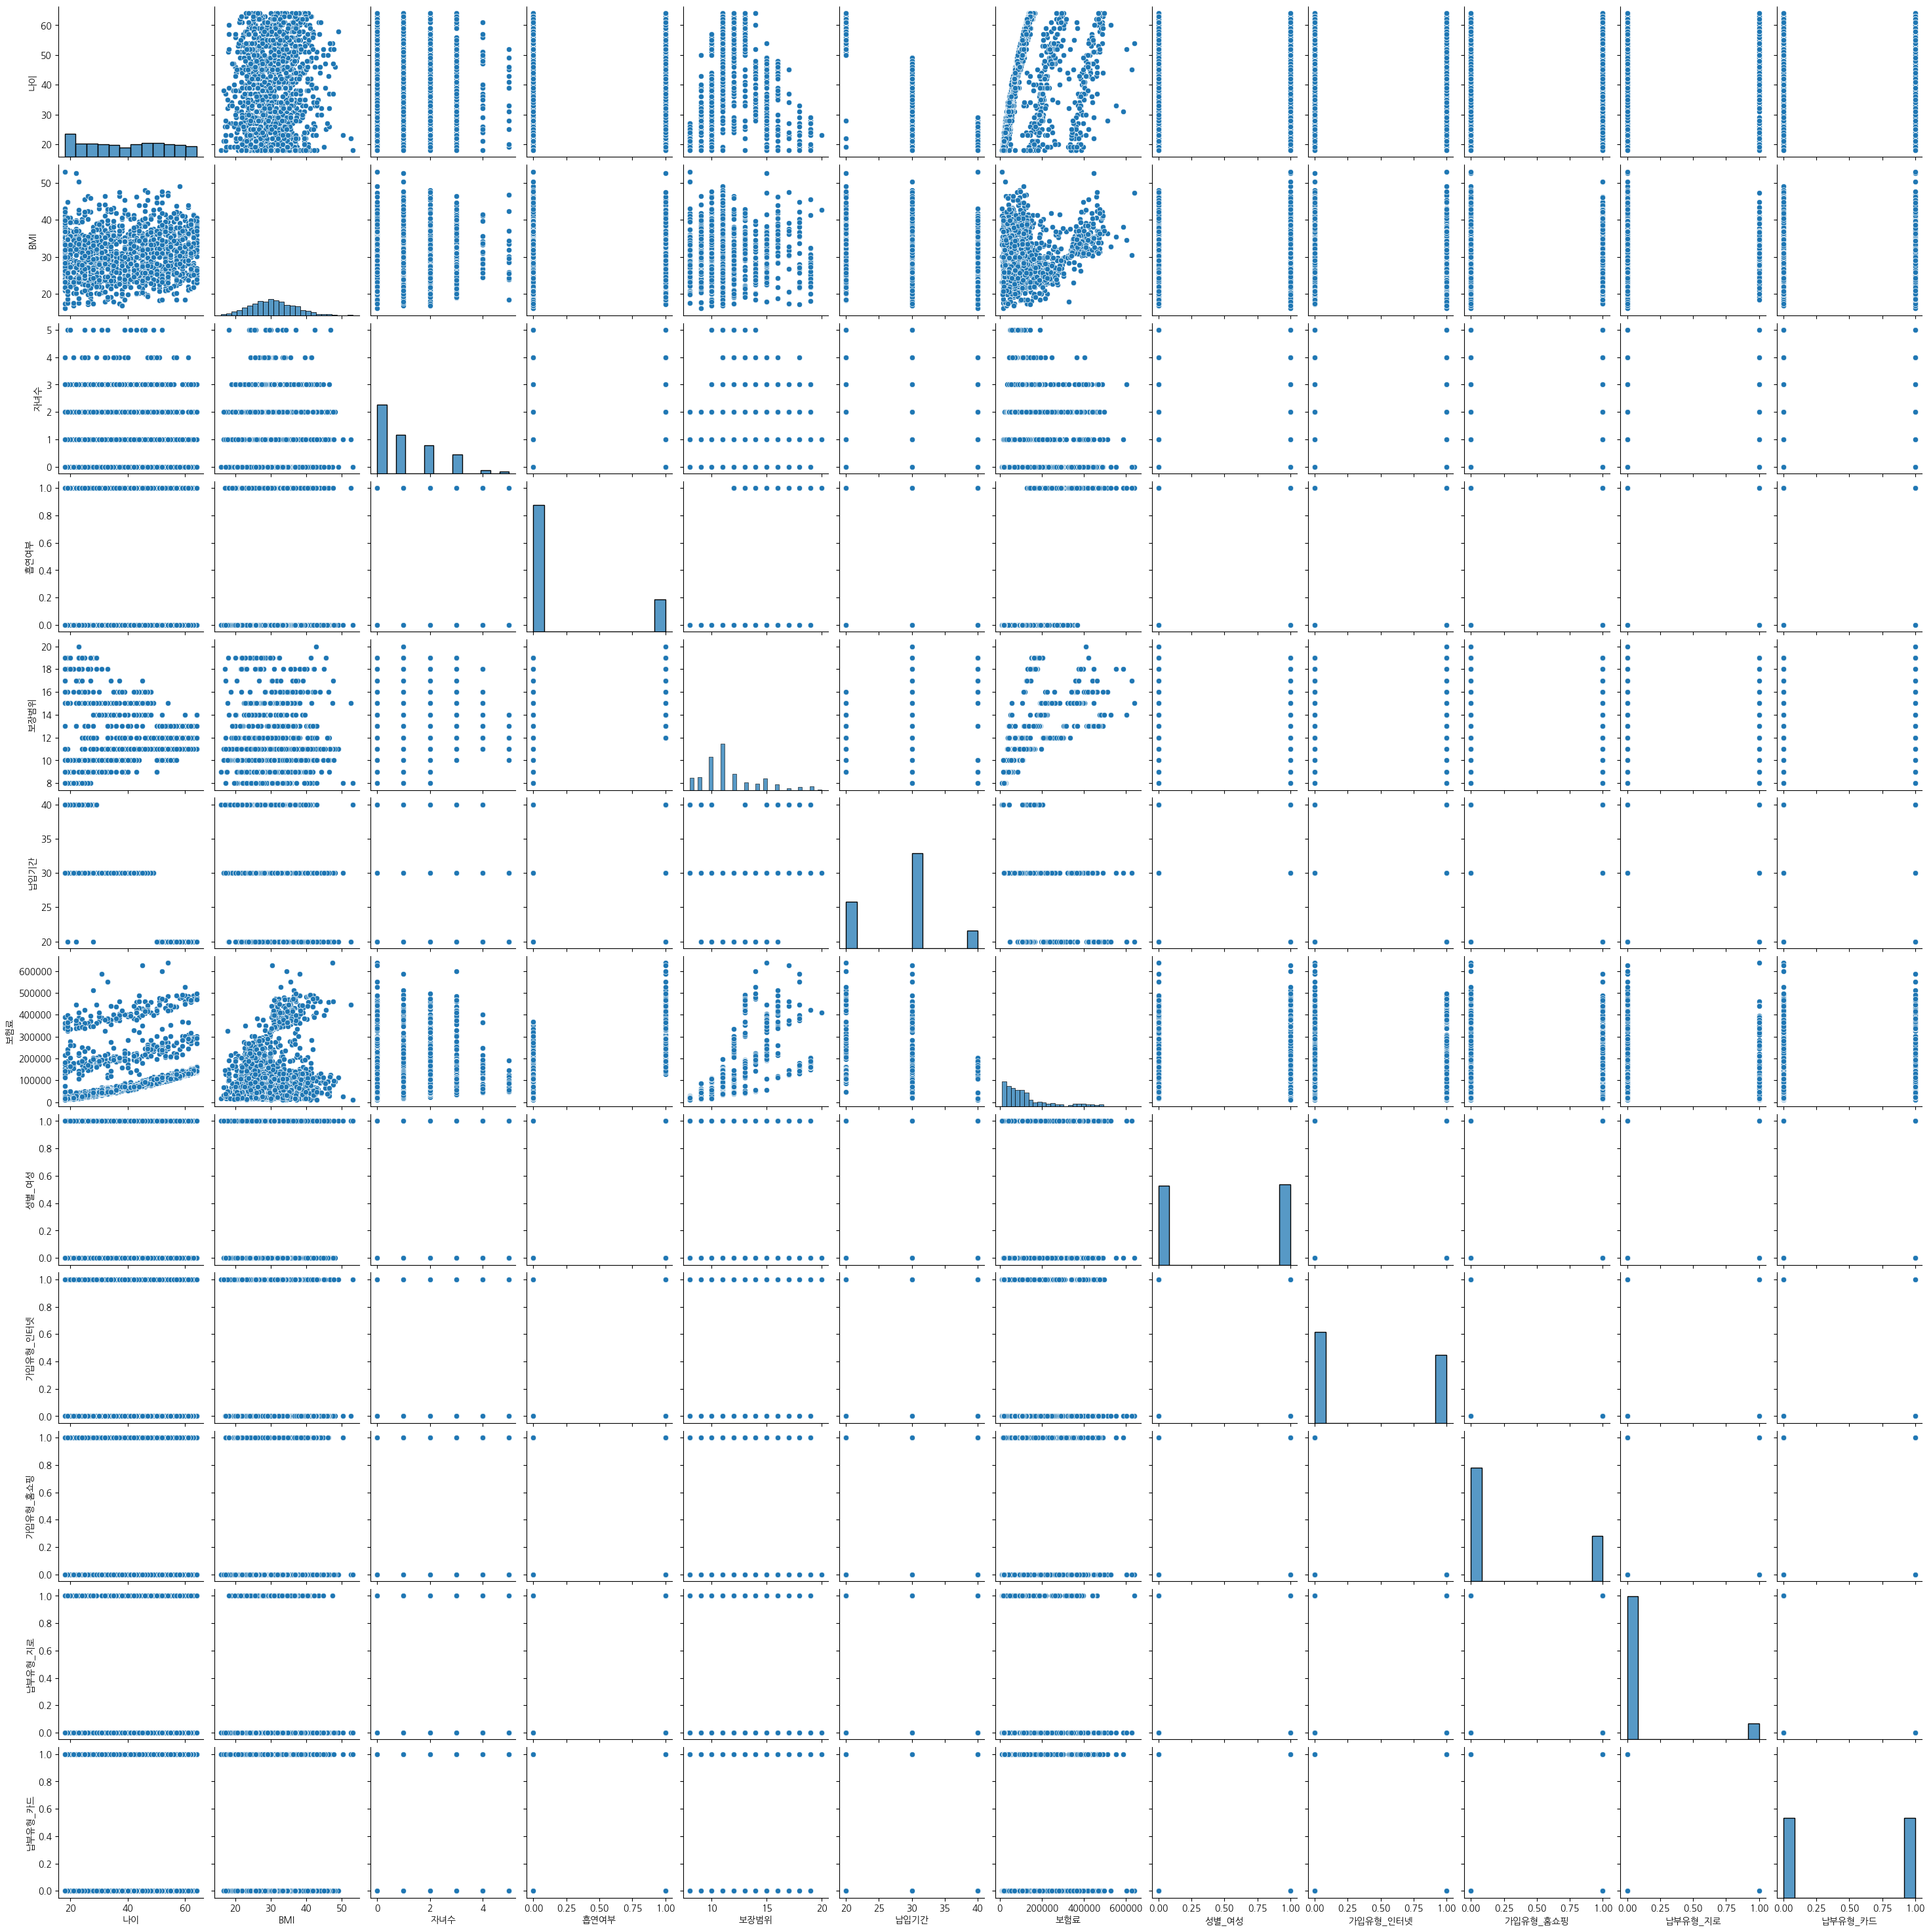

In [85]:
# 산점도 행렬:전체 숫자형 변수
sns.pairplot(df_dummy)

In [86]:
# 목표변수와 설명변수의 상관계수
df_dummy.corr(method = "pearson").round(3)

,나이,BMI,자녀수,흡연여부,보장범위,납입기간,보험료,성별_여성,가입유형_인터넷,가입유형_홈쇼핑,납부유형_지로,납부유형_카드
나이,1.000,0.108,0.045,-0.021,-0.019,-0.826,0.302,-0.018,-0.020,-0.018,-0.003,-0.023
BMI,0.108,1.000,0.013,0.003,0.015,-0.139,0.198,0.046,-0.020,-0.025,0.017,0.001
자녀수,0.045,0.013,1.000,0.007,0.188,-0.039,0.068,0.021,-0.012,-0.028,-0.026,0.022
흡연여부,-0.021,0.003,0.007,1.000,0.701,0.045,0.788,0.075,-0.086,0.058,0.002,-0.001
보장범위,-0.019,0.015,0.188,0.701,1.000,0.144,0.704,-0.005,-0.092,0.064,0.025,0.001
납입기간,-0.826,-0.139,-0.039,0.045,0.144,1.000,-0.283,0.055,0.028,0.007,0.012,0.003
보험료,0.302,0.198,0.068,0.788,0.704,-0.283,1.000,0.058,-0.097,0.048,0.015,0.001
성별_여성,-0.018,0.046,0.021,0.075,-0.005,0.055,0.058,1.000,0.014,-0.027,-0.005,0.035
가입유형_인터넷,-0.020,-0.020,-0.012,-0.086,-0.092,0.028,-0.097,0.014,1.000,-0.549,-0.005,-0.002
가입유형_홈쇼핑,-0.018,-0.025,-0.028,0.058,0.064,0.007,0.048,-0.027,-0.549,1.000,0.111,-0.064


In [105]:
# train/test data 분리
df_train, df_test = train_test_split(df_dummy, test_size = 0.3, random_state = 1234) 
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (940, 12)
test data size : (403, 12)


In [106]:
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept)은 자동으로 추가됨
reg_model = smf.ols(formula = "보험료 ~ 성별_여성+나이+BMI+자녀수+흡연여부+가입유형_인터넷+가입유형_홈쇼핑+납부유형_지로+납부유형_카드+보장범위+납입기간", data = df_dummy)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    보험료   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     536.5
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:06:25   Log-Likelihood:                -16487.
No. Observations:                1343   AIC:                         3.300e+04
Df Residuals:                    1331   BIC:                         3.306e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -5.77e+04   2.04e+04     -2.825      0.0

In [107]:
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop('보험료', axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
2,BMI,1.04
7,성별_여성,1.04
3,자녀수,1.08
11,납부유형_카드,1.14
10,납부유형_지로,1.15
8,가입유형_인터넷,1.51
9,가입유형_홈쇼핑,1.53
4,흡연여부,2.18
5,보장범위,2.33
1,나이,3.28


In [109]:
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept)은 자동으로 추가됨
reg_model = smf.ols(formula = "보험료 ~ 성별_여성+나이+BMI+흡연여부+보장범위+납입기간", data = df_dummy)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    보험료   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     983.7
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:08:56   Log-Likelihood:                -16489.
No. Observations:                1343   AIC:                         3.299e+04
Df Residuals:                    1336   BIC:                         3.303e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.869e+04   2.01e+04     -2.917      0.0

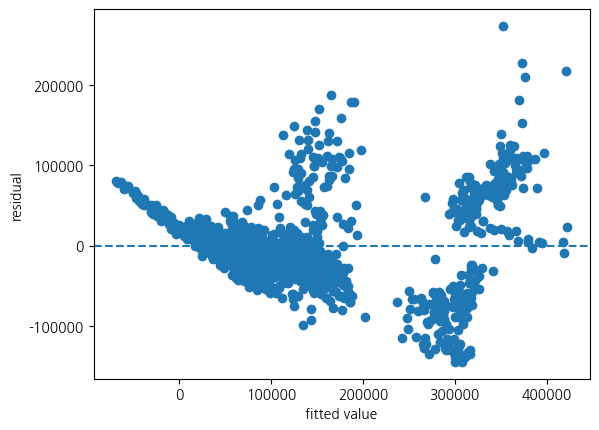

In [110]:
# 잔차 산점도: X-예측값, Y-잔차 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

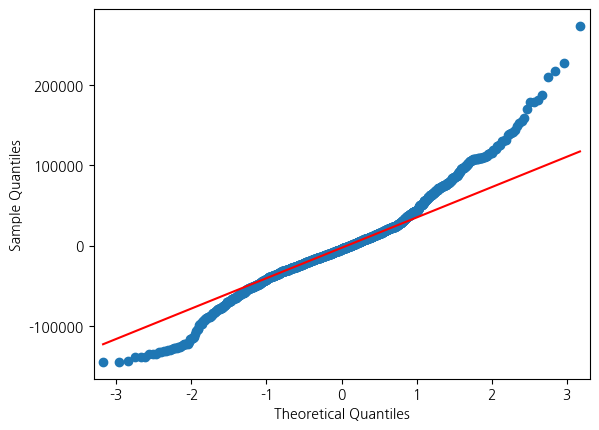

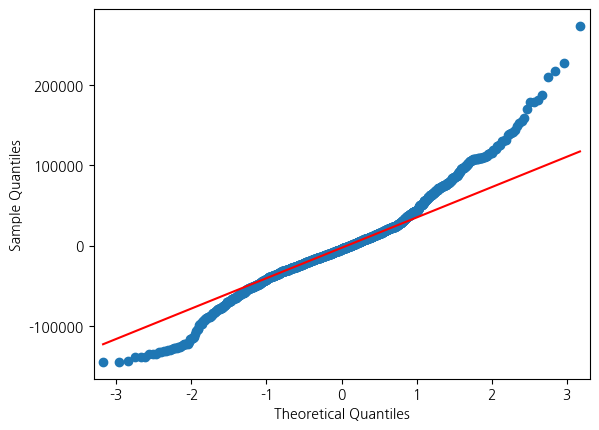

In [111]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line, 
#  r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

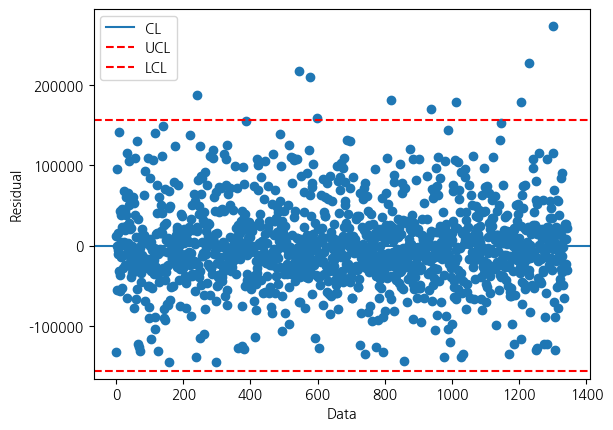

In [123]:
# 잔차의 독립성 확인
plt.scatter(df_dummy.index, reg_result.resid)
plt.xlabel("Data")  ;  plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL' )
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend()

In [126]:
# 평가용 데이터에 대한 성능 확인
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['보험료'], train_pred))
print("test data의 결정계수:", r2_score(df_test['보험료'], test_pred))

train data의 결정계수: 0.817313797644572
test data의 결정계수: 0.8098671610687374


In [129]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test['보험료'].head(10))
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 1240    472698
697     402736
324      28660
237      44632
905      45641
535      60671
945     116741
900      86888
411     195948
956     419995
Name: 보험료, dtype: int64
test data의 예측값 : 
 1240    376270.739153
697     331133.944556
324      31883.865793
237      64796.730007
905      98117.971609
535      74359.082978
945     156531.354015
900      65856.758312
411     264773.302288
956     346479.991919
dtype: float64


<Axes: >

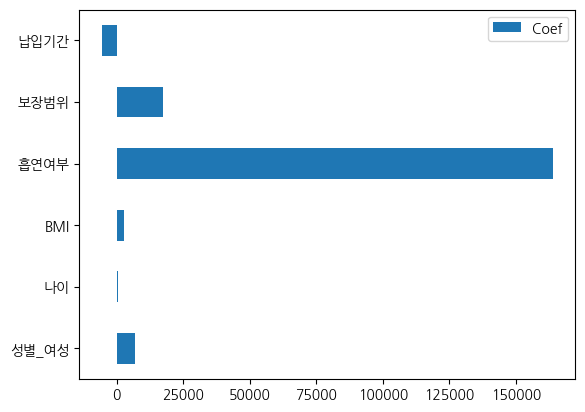

In [131]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},  
                           index = ['성별_여성','나이','BMI','흡연여부','보장범위','납입기간'])
df_reg_coef.plot.barh(y = "Coef")

In [ ]:
# 결론
- 흡연여부가 존재할 수록 보험료가 높음